# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [23]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [66]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [25]:
# YOUR CODE HERE
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")

df=pd.read_csv(WHRDataSet_filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [26]:
# YOUR CODE HERE
availableFeatures=list(df.columns) #1
print(availableFeatures)
print(df.shape)
print(df.dtypes)
df.isnull().sum(axis = 0) #Number of nulls column wise

['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']
(1562, 19)
country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [27]:
#As GINI index (World Bank estimate)  has more than half rows as nulls, we can have a more reliable
#model by not using it as a feature

In [28]:
df.describe()[['GINI index (World Bank estimate), average 2000-15','gini of household income reported in Gallup, by wp5-year','GINI index (World Bank estimate)']]

,"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year",GINI index (World Bank estimate)
count,1386.000000,1205.000000,583.000000
mean,0.386948,0.445204,0.372846
std,0.083694,0.105410,0.086609
min,0.228833,0.223470,0.241000
25%,0.321583,0.368531,0.307000
50%,0.371000,0.425395,0.349000
75%,0.433104,0.508579,0.433500
max,0.626000,0.961435,0.648000


In [29]:
df.corr()


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
year,1.000000,-0.014505,0.051140,-0.052845,0.100904,0.134332,-0.014111,-0.051141,-0.024730,0.171805,-0.018925,-0.017400,-0.011016,0.273838,0.209680,-0.053342,-0.026927,0.071773
Life Ladder,-0.014505,1.000000,0.779476,0.700299,0.729852,0.526058,0.204910,-0.425013,0.554462,-0.267492,-0.085543,0.607034,0.706673,-0.154257,-0.756076,-0.097255,-0.172745,-0.294080
Log GDP per capita,0.051140,0.779476,1.000000,0.658591,0.841612,0.362998,-0.000334,-0.350142,0.311868,-0.120597,-0.162000,0.630107,0.770370,-0.086494,-0.566376,-0.342142,-0.314639,-0.355850
Social support,-0.052845,0.700299,0.658591,1.000000,0.586759,0.418213,0.077543,-0.217857,0.459656,-0.352552,-0.160353,0.536387,0.545010,-0.174091,-0.594465,-0.148387,-0.128284,-0.314072
Healthy life expectancy at birth,0.100904,0.729852,0.841612,0.586759,1.000000,0.340026,0.047079,-0.311037,0.297759,-0.105255,-0.188827,0.597106,0.721081,-0.065870,-0.526026,-0.306798,-0.364279,-0.422890
Freedom to make life choices,0.134332,0.526058,0.362998,0.418213,0.340026,1.000000,0.357158,-0.496932,0.615916,-0.284391,0.408096,0.445323,0.486678,-0.081104,-0.369111,0.044033,0.057697,0.108313
Generosity,-0.014111,0.204910,-0.000334,0.077543,0.047079,0.357158,1.000000,-0.305019,0.380896,-0.117508,0.275648,0.118966,0.203871,-0.182119,-0.193145,-0.016602,-0.043810,0.194036
Perceptions of corruption,-0.051141,-0.425013,-0.350142,-0.217857,-0.311037,-0.496932,-0.305019,1.000000,-0.302946,0.267359,-0.436614,-0.322063,-0.514183,0.301730,0.378509,0.158565,0.170775,-0.043064
Positive affect,-0.024730,0.554462,0.311868,0.459656,0.297759,0.615916,0.380896,-0.302946,1.000000,-0.384112,0.144219,0.369666,0.365544,-0.069609,-0.410061,0.371113,0.298045,0.121792
Negative affect,0.171805,-0.267492,-0.120597,-0.352552,-0.105255,-0.284391,-0.117508,0.267359,-0.384112,1.000000,-0.159316,-0.198636,-0.211019,0.510342,0.520042,0.171791,0.074559,0.148413


In [30]:
#Country did not have a cor-relation value as it was a categorical column, we can perform one hot 
#encoding on that column

#Creating a dataframe with dummy columns to be added to filtered data column

country_dummies=pd.get_dummies(df["country"], columns=["country"])
country_dummies.columns
df.join(country_dummies)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,...,0,0,0,0,0,0,0,0,0,1
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,...,0,0,0,0,0,0,0,0,0,1
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,...,0,0,0,0,0,0,0,0,0,1
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#2 of the features involve a gini index and based on viewing of the max, mean and standard deviation
#They are not so separate in distribution. Upon further Reading, it seems GINI of household income is different
#from that of the the GINI index with one looking at nation's income and the other a family's one.

#In the original research question, life ladder was the variable which being tried to measure based on
#the other features so we would not be able to use that in our calculation for it causes data leakage. 

#If we use different forms of the same measurement, features would not be independent of one another
#After seeing which features meet the minimum correlation, we should replace the nulls in those with the
#feature's mean. 

#Droping all life ladder columns, GINI index (World Bank estimate) and Country as it contains the dummy columns too
df.drop(columns=['Standard deviation/Mean of ladder by country-year','Standard deviation of ladder by country-year','Life Ladder','GINI index (World Bank estimate)',"country"], inplace=True)
df.columns

Index(['year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [32]:
#Get columns whose correlation is higher than 0.05
correlationMatrix=df.corr()
correlationMatrix[abs(correlationMatrix["Confidence in national government"])>0.05].columns
relevantColumns=list(correlationMatrix[abs(correlationMatrix["Confidence in national government"])>0.05].columns)
print(relevantColumns)

['year', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


In [33]:
#creating dataframe with relevant corelation columns
df=df[relevantColumns]
df.shape[1]
#Checking of the dataframe now only contains relevant columns by comaparing the number of columns in it
#and the length of relevantColumns

14

In [34]:
#fill each columns' nulls with its repective mean
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)
df.isna().sum()

year                                                        0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
GINI index (World Bank estimate), average 2000-15           0
gini of household income reported in Gallup, by wp5-year    0
dtype: int64

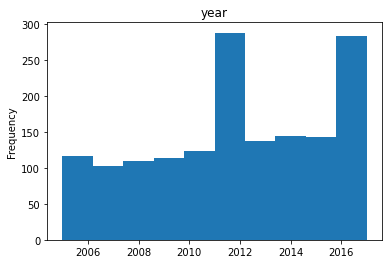

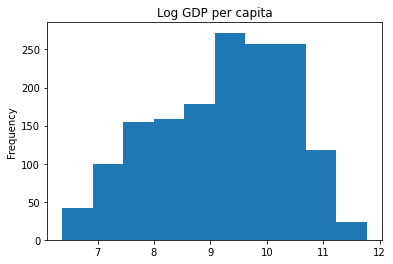

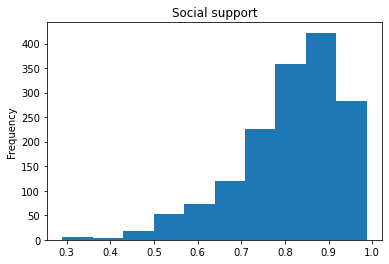

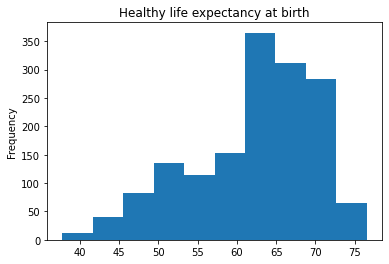

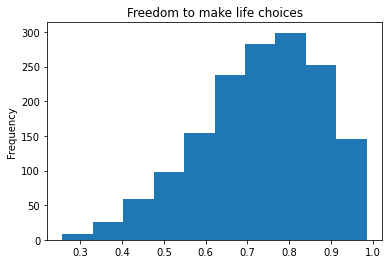

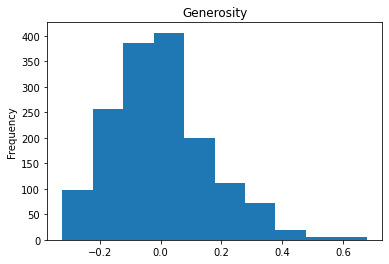

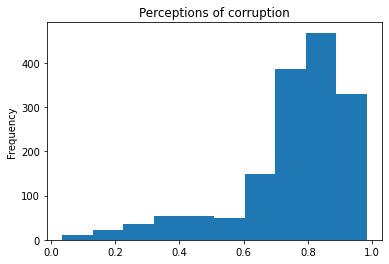

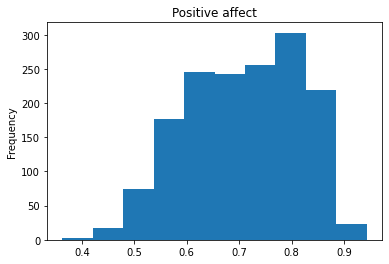

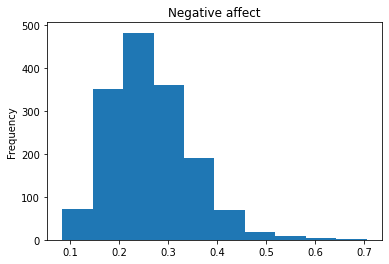

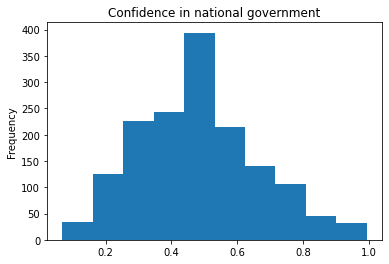

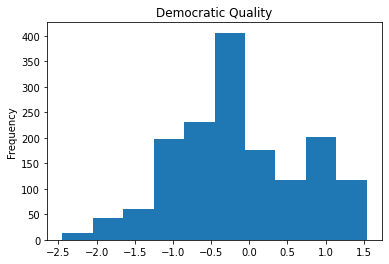

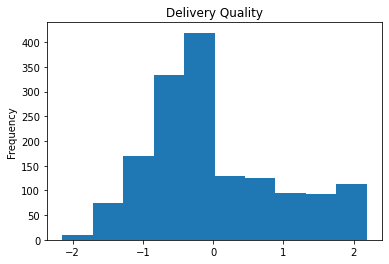

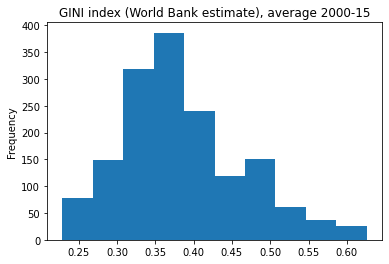

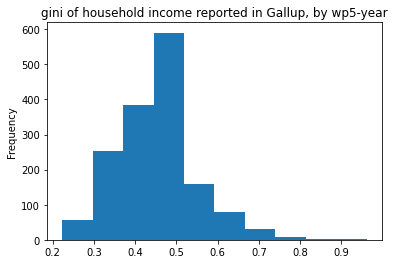

In [35]:
#We would then need to check for outliers in our columns and if winsorization is needed
for column in df.columns:
    df[column].plot(kind="hist")
    plt.title(column)
    plt.show()

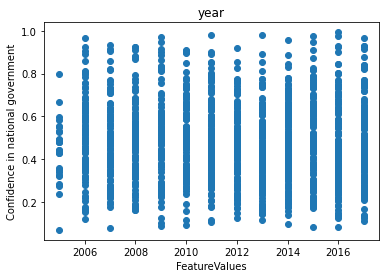

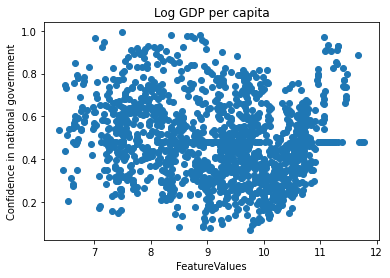

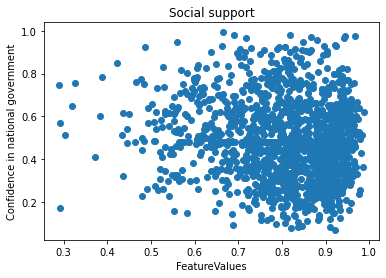

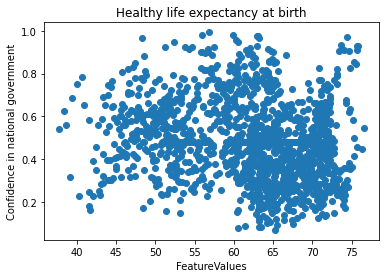

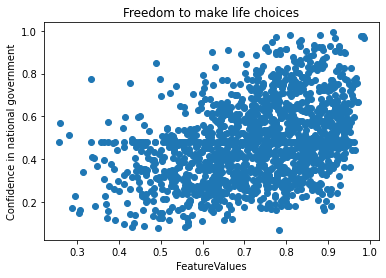

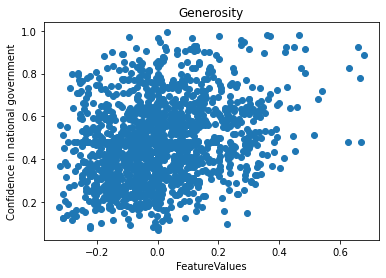

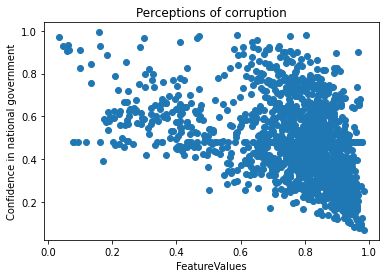

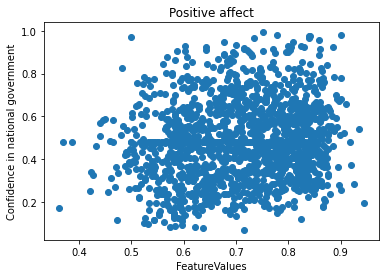

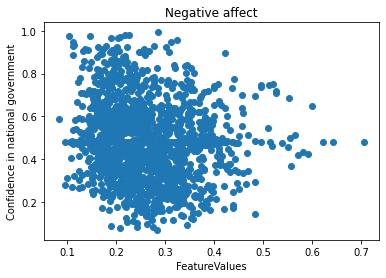

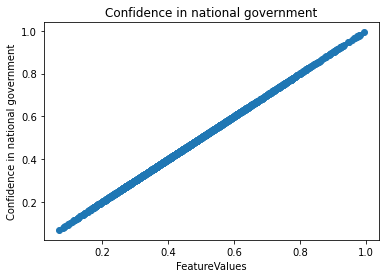

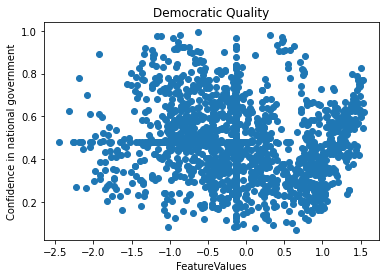

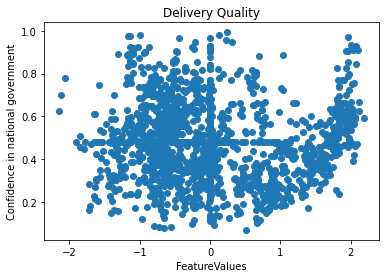

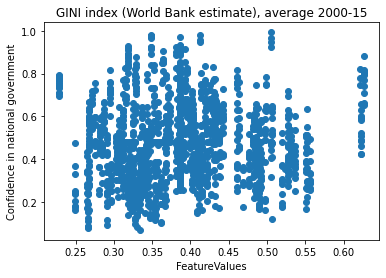

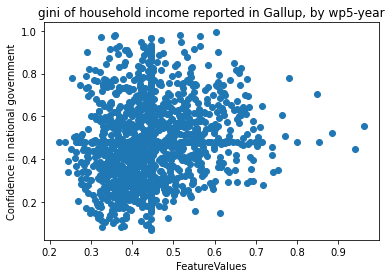

In [36]:
#Even though, the distrbution of values in the potential features are not all normal like negative effect
#delivery Quality, gini household I think winsorization should not be performed as the dataset is a mix
#of both surveys and standards of measurements so the outliers can be of significance for a model

#Ploting the scatterplots between column and label to check if relationship is linear
for column in df.columns:
    plt.scatter(df[column],df['Confidence in national government'])
    plt.xlabel("FeatureValues")
    plt.ylabel('Confidence in national government')
    plt.title(column)
    plt.show()

In [37]:
#It seems features like Year do not have a linear relationship with y variable. Additionally,
#features like Democratic Quality and Delivery Quality have a simillar relationship with the 
#label bringing the question whether or not these two features themselves are co-related or not. 

#For now we can keep these, then after training the model we can know among which of the potentially
#co-related features, which one has more importance in model prediction

#Normalizing dataset 


In [38]:
#Re-adding the country dummy columns 
df=df.join(country_dummies)


In [39]:
#Normalizing values in the dataset to ensure predictions are not impacted just by scale 
#Ensuring all values for features in the dataframe are in the range 0 to 1
scaler=MinMaxScaler()
scaler.fit(df)
scaled=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled,columns=df.columns)

In [40]:
scaled_df

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0.250000,0.146729,0.230189,0.295157,0.632975,0.504406,0.892847,0.266965,0.281358,0.587459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.177344,0.375989,0.305855,0.579078,0.526185,0.859462,0.381035,0.247385,0.586890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.416667,0.187142,0.357007,0.315773,0.470826,0.460249,0.708347,0.440127,0.308933,0.249329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.192406,0.331229,0.325016,0.327588,0.497920,0.734022,0.428291,0.295814,0.258010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.583333,0.211340,0.330559,0.333836,0.375735,0.569698,0.780971,0.598646,0.297012,0.396472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,0.666667,0.220246,0.730234,0.288452,0.437509,0.246058,0.839318,0.601229,0.159156,0.496290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1558,0.750000,0.219800,0.682276,0.316863,0.528418,0.276867,0.828011,0.624164,0.250634,0.537869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1559,0.833333,0.218558,0.639188,0.339417,0.562994,0.228202,0.817717,0.606724,0.153640,0.563607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1560,0.916667,0.215364,0.685986,0.361971,0.653393,0.257482,0.726115,0.645540,0.201443,0.681824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [46]:
#First we can start out with spliting the dataset and using a simple linear regression
features=[]

X=scaled_df.drop(columns="Confidence in national government",inplace=False)
y=scaled_df["Confidence in national government"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [47]:
#Performance with simple linear regression model
linearReg=LinearRegression()
linearReg.fit(X_train,y_train)
linearRegPred=linearReg.predict(X_test)
linearRegRMSE=np.sqrt(mean_squared_error(y_test,linearRegPred))
linearRegR2=r2_score(y_test,linearRegPred)
print("LinearReg: RMSE",linearRegRMSE,"R2",linearRegR2)

LinearReg: RMSE 0.10684213512866599 R2 0.6761433226230071


In [54]:
print(X_train.shape)
print(y_train.shape)

(1093, 177)
(1093,)


Text(0.5, 1.0, 'Histogram of Residuals')

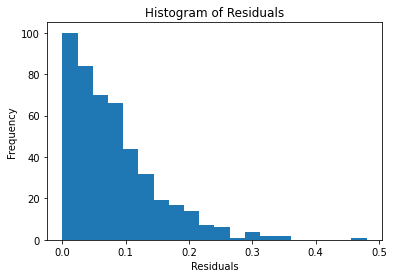

In [64]:
#Potting error distribution of regression to see if there is a pattern
residuals=abs(y_test-linearRegPred)
plt.hist(residuals,bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

In [111]:
# Even though RMSE is low, R2 is too low indicating that the model does not fit well to cover the
#dataset. Upon viewing the historgram of residual, there is learly a trend in the errors indicating 
#there is no normal distribution and the model is not performing well

#As there are lower errors occur more frequently compared to high errors, our model may be overfitted
#So as to counter that instead, I will also be trying the Gradient Boosted Decision Trees

In [131]:
#Finding optimal hyper-parameters for RandomForest 
randomForest=RandomForestRegressor()
parameters={"n_estimators":[150,155,175],"min_samples_leaf":[10,25,50,100,150,200],"min_samples_split":[2,10,15,25,30] }
randomForestCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
randomForestCV.fit(X_train, y_train)
print(randomForestCV.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [132]:
randomForest=RandomForestRegressor(n_estimators=150, min_samples_split=10,)
randomForest.fit(X_train,y_train)
randomForestPred=randomForest.predict(X_test)
randomForestRMSE=np.sqrt(mean_squared_error(y_test,randomForestPred))
randomForestR2=r2_score(y_test,randomForestPred)
print("Random Forest: RMSE",randomForestRMSE,"R2",randomForestR2)


Random Forest: RMSE 0.11345081406798367 R2 0.6348401901794609


In [123]:
#Getting feature importance:
feature_scores=pd.Series(randomForest.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Text(0, 0.5, 'Name of Feature')

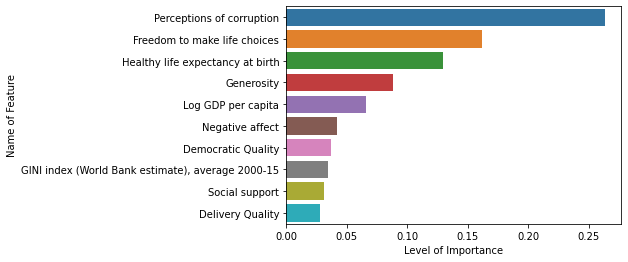

In [124]:
#Plotting the 20 most imoportant features
feature_plot=sns.barplot(x=feature_scores[:10],y=feature_scores.index[:10])
feature_plot.set_xlabel("Level of Importance")
feature_plot.set_ylabel("Name of Feature")

In [125]:
#Countries do not seem to be an importance feature at all, and so does year, gini of household income
#We can drop the othern columns and just use the top 10 features in our evalutation. Suprisingly, Democratic Quality
#is not as important as the others for level of confidence in govt
important_features=list(feature_scores.keys()[:10])
important_features.append("Confidence in national government")

In [126]:
scaled_df["Confidence in national government"]

0       0.587459
1       0.586890
2       0.249329
3       0.258010
4       0.396472
          ...   
1557    0.496290
1558    0.537869
1559    0.563607
1560    0.681824
1561    0.663770
Name: Confidence in national government, Length: 1562, dtype: float64

In [127]:
mod_df=scaled_df[important_features]

In [128]:
X_2=mod_df.drop(columns="Confidence in national government",inplace=False)
y_2=mod_df["Confidence in national government"]
X_train2,X_test2,y_train2,y_test2=train_test_split(X_2,y_2,test_size=0.30,random_state=42)

In [129]:
rf2=RandomForestRegressor(n_estimators=30, min_samples_split=10,)

rf2.fit(X_train2,y_train2)
rf2_pred=rf2.predict(X_test2)
rf2_RMSE=np.sqrt(mean_squared_error(y_test2,rf2_pred))
rf2_R2=r2_score(y_test,rf2_pred)
print("2nd Random Forest: RMSE",rf2_RMSE,"R2",rf2_R2)

2nd Random Forest: RMSE 0.11696878425433344 R2 0.611842759999121


In [139]:
#The lower number of features might have been why the RMSE and R2 decreased with the RandomForest

#Implementing GBDT by first finding optimal hyperparameters
gbdt=GradientBoostingRegressor(random_state=0)
parameters_gbdt={"n_estimators":[150,155,175],"min_samples_leaf":[30,50,100,150],"min_samples_split":[2,10,15,25,30],"learning_rate":[0.1,0.15] }
cv_gbdt=GridSearchCV(gbdt,parameters_gbdt,cv=5)
cv_gbdt.fit(X_train2,y_train2)
print(cv_gbdt.best_estimator_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=30, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=175,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [142]:
gradient_bdt=GradientBoostingRegressor(n_estimators=175,min_samples_leaf=30,min_samples_split=2,learning_rate=0.15)
gradient_bdt.fit(X_train2,y_train2)
gbdt_pred=gradient_bdt.predict(X_test2)
gbdt_RMSE=np.sqrt(mean_squared_error(y_test2,gbdt_pred))
gbdt_R2=r2_score(y_test2,gbdt_pred)
print(gbdt_RMSE, gbdt_R2)

0.11763384159021467 0.6074162678710856


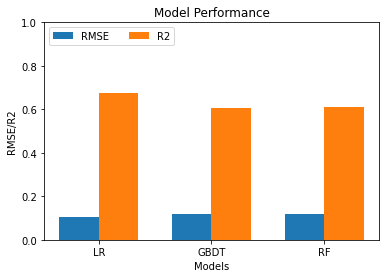

In [150]:
RMSE_Results = [linearRegRMSE, gbdt_RMSE, rf2_RMSE]
R2_Results = [linearRegR2,gbdt_R2, rf2_R2]
labels = ['LR', 'GBDT', 'RF']

rg= np.arange(3)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [ ]:
#Surpisingly, the inital multi linear regression model performs better than the modified Random Fores
#and the GBDT. This is probably due to how some of the features used did not have a linear relation
#whereas some others clearly did like Perceptions of Corruption, Generosity etc enforce a
#more straightforward prediction. In order to account for the features, if time allowed I would 
#probably try a  neural network as well to see how non-linear features would have impacted the
#predictions. 

#Additionally, if I decrease the number of features furthe and performed winsorization, I could have
#gotten the expected result of the stack models performing better